# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [25]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# 設定 data_path
dir_data = 'C:/Users/鋒/Desktop/Python/機器學習-百日/HW18/'

### 之前做過的處理

In [11]:
# 讀取資料檔p
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [12]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train[c] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [21]:
app_train['age']=app_train['DAYS_BIRTH']/365
print(app_train['age'].sort_values())
app_train['age'].head()

235444    20.517808
168135    21.021918
53702     21.030137
170384    21.030137
220805    21.035616
            ...    
130108    69.032877
143266    69.041096
124430    69.043836
63316     69.043836
265026    69.120548
Name: age, Length: 307511, dtype: float64


0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: age, dtype: float64

In [19]:
app_train["equal_width_age"] = pd.cut(app_train["age"], 4)
app_train["equal_width_age"].value_counts()

(32.668, 44.819]    100808
(44.819, 56.97]      84685
(20.469, 32.668]     66536
(56.97, 69.121]      55482
Name: equal_width_age, dtype: int64

In [20]:
app_train["equal_freq_age"] = pd.qcut(app_train["age"], 4)
app_train["equal_width_age"].value_counts()

(32.668, 44.819]    100808
(44.819, 56.97]      84685
(20.469, 32.668]     66536
(56.97, 69.121]      55482
Name: equal_width_age, dtype: int64

In [23]:
bins=[20,25,30,35,40,45,50,55,60,65,70]
app_train['customized_age_grp']=pd.cut(app_train['age'],bins)
app_train['customized_age_grp'].value_counts()

(35, 40]    42868
(40, 45]    41406
(30, 35]    39440
(45, 50]    35135
(50, 55]    34942
(55, 60]    33120
(25, 30]    32862
(60, 65]    27476
(20, 25]    12159
(65, 70]     8103
Name: customized_age_grp, dtype: int64

Text(0.5, 1.0, 'Failure to Repay by Age Group')

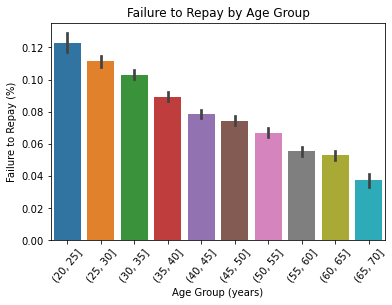

In [26]:
x = app_train['customized_age_grp']
y = app_train['TARGET']
sns.barplot(x, y)
# Plot labeling
plt.xticks(rotation = 50)
plt.xlabel('Age Group (years)') 
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')